IMPORTS AND LIBS


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
import time
!pip install pyclustering
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric

In [ ]:
df = pd.read_csv("/content/train.csv (1).zip", on_bad_lines='warn')
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [ ]:
df.shape

(878049, 9)

In [ ]:
df.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212


In [ ]:
df.at[df.index[-1], 'X'] =-122.405469
df.at[df.index[-1], 'Y'] =37.79387
df.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.405469,37.793870


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [ ]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [ ]:
df.duplicated().sum()

np.int64(2323)

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(875726, 9)

In [ ]:
df[df['Address'] == '700 Block of COMMERCIAL ST']

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
15722,2015-02-22 23:00:00,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Sunday,CENTRAL,NONE,700 Block of COMMERCIAL ST,-122.405469,37.793870
25179,2015-01-10 18:22:00,NON-CRIMINAL,"AIDED CASE, INJURED PERSON",Saturday,CENTRAL,NONE,700 Block of COMMERCIAL ST,-122.405469,37.793870
29050,2014-12-24 20:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,700 Block of COMMERCIAL ST,-122.405469,37.793870
34606,2014-11-26 15:50:00,ASSAULT,BATTERY,Wednesday,CENTRAL,"ARREST, BOOKED",700 Block of COMMERCIAL ST,-122.405491,37.793979
34607,2014-11-26 15:50:00,ASSAULT,WILLFUL CRUELTY TO CHILD,Wednesday,CENTRAL,"ARREST, BOOKED",700 Block of COMMERCIAL ST,-122.405491,37.793979
52666,2014-09-02 21:20:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,CENTRAL,NONE,700 Block of COMMERCIAL ST,-122.405469,37.793870
55048,2014-08-21 12:00:00,OTHER OFFENSES,FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY,Thursday,CENTRAL,NONE,700 Block of COMMERCIAL ST,-122.405469,37.793870
115268,2013-10-28 22:30:00,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Monday,CENTRAL,NONE,700 Block of COMMERCIAL ST,-122.405491,37.793979
151440,2013-05-14 17:25:00,STOLEN PROPERTY,"STOLEN PROPERTY, POSSESSION WITH KNOWLEDGE, RE...",Tuesday,CENTRAL,"ARREST, BOOKED",700 Block of COMMERCIAL ST,-122.405491,37.793979
194816,2012-10-15 08:00:00,DISORDERLY CONDUCT,"DISTURBING THE PEACE, COMMOTION",Monday,CENTRAL,NONE,700 Block of COMMERCIAL ST,-122.405469,37.793870


In [ ]:
df.describe()

,Dates,X,Y
count,875726,875726.000000,875726.000000
mean,2009-03-16 09:08:31.826667776,-122.422623,37.771032
min,2003-01-06 00:01:00,-122.513642,37.707879
25%,2006-01-11 01:04:45,-122.432952,37.752427
50%,2009-03-07 16:37:30,-122.416446,37.775421
75%,2012-06-11 11:15:00,-122.406959,37.784380
max,2015-05-13 23:53:00,-120.500000,90.000000
std,NaN,0.030363,0.457497


In [ ]:
df.nunique()

,0
Dates,389257
Category,39
Descript,879
DayOfWeek,7
PdDistrict,10
Resolution,17
Address,23228
X,34243
Y,34243


In [ ]:
df["Category"].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [ ]:
df["PdDistrict"].unique()

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [ ]:
df["Resolution"].unique()

array(['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE',
       'JUVENILE BOOKED', 'UNFOUNDED', 'EXCEPTIONAL CLEARANCE', 'LOCATED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED',
       'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'JUVENILE CITED',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE'],
      dtype=object)

In [ ]:
# Total number of records for each crime category
g1 = df.groupby("Category").size()
g1

,0
Category,
ARSON,1512
ASSAULT,76815
BAD CHECKS,406
BRIBERY,289
BURGLARY,36600
DISORDERLY CONDUCT,4313
DRIVING UNDER THE INFLUENCE,2268
DRUG/NARCOTIC,53919
DRUNKENNESS,4277


In [ ]:
# Total number of crimes per police district.
g2 = df.groupby("PdDistrict").size()
g2

,0
PdDistrict,
BAYVIEW,89098
CENTRAL,85267
INGLESIDE,78722
MISSION,119723
NORTHERN,105105
PARK,49161
RICHMOND,45080
SOUTHERN,156528
TARAVAL,65400


In [ ]:
#Number of cases per resolution type
g3 = df.groupby("Resolution").size()
g3

,0
Resolution,
"ARREST, BOOKED",206173
"ARREST, CITED",76832
CLEARED-CONTACT JUVENILE FOR MORE INFO,217
COMPLAINANT REFUSES TO PROSECUTE,3969
DISTRICT ATTORNEY REFUSES TO PROSECUTE,3934
EXCEPTIONAL CLEARANCE,1528
JUVENILE ADMONISHED,1451
JUVENILE BOOKED,5564
JUVENILE CITED,3322


In [ ]:
#Number of crimes reported at each address.
g4 = df.groupby("Address").size()
g4

,0
Address,
0 Block of HARRISON ST,1
0 Block of 10TH AV,5
0 Block of 10TH ST,49
0 Block of 11TH ST,48
0 Block of 12TH AV,7
...,...
ZENO PL / FOLSOM ST,3
ZOE ST / BRANNAN ST,10
ZOE ST / BRYANT ST,10


In [ ]:
# Extract relevant numerical features (geographic coordinates)
features = ['X', 'Y']  # Longitude and latitude
X = df[features]

In [ ]:
# Step 2: Remove outliers using IQR

x = df['X']
y = df['Y']


Q1_X = df['X'].quantile(0.25)
Q3_X = df['X'].quantile(0.75)
IQR_X = Q3_X - Q1_X

Q1_Y = df['Y'].quantile(0.25)
Q3_Y = df['Y'].quantile(0.75)
IQR_Y = Q3_Y - Q1_Y

lower_bound_X = Q1_X - 1.5 * IQR_X
upper_bound_X = Q3_X + 1.5 * IQR_X

lower_bound_Y = Q1_Y - 1.5 * IQR_Y
upper_bound_Y = Q3_Y + 1.5 * IQR_Y

df_cleaned = df[(df['X'] >= lower_bound_X) & (df['X'] <= upper_bound_X) &
                (df['Y'] >= lower_bound_Y) & (df['Y'] <= upper_bound_Y)]

outliers = df[
    (x < (Q1_X - 1.5 * IQR_X)) |(x > (Q3_X + 1.5 * IQR_X)) |
    (y < (Q1_Y - 1.5 * IQR_Y)) | (y > (Q3_Y + 1.5 * IQR_Y))
]


print("number of Outliers:", len(outliers))
display(outliers)


number of Outliers: 60126


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
11,2015-05-13 22:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,TARAVAL,NONE,0 Block of ESCOLTA WY,-122.487983,37.737667
28,2015-05-13 21:00:00,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Wednesday,TARAVAL,NONE,19TH AV / SANTIAGO ST,-122.475773,37.744919
29,2015-05-13 20:56:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,TARAVAL,NONE,2000 Block of 41ST AV,-122.499787,37.748518
38,2015-05-13 20:29:00,WEAPON LAWS,SUSPICIOUS PACKAGE,Wednesday,TARAVAL,NONE,1400 Block of HOLLOWAY AV,-122.473182,37.721565
...,...,...,...,...,...,...,...,...,...
877979,2003-01-06 08:13:00,VEHICLE THEFT,"VEHICLE, RECOVERED, MOTORCYCLE",Monday,TARAVAL,"ARREST, CITED",JUNIPERO SERRA BL / HOLLOWAY AV,-122.472322,37.721622
877980,2003-01-06 08:13:00,VEHICLE THEFT,STOLEN MOTORCYCLE,Monday,TARAVAL,"ARREST, CITED",JUNIPERO SERRA BL / HOLLOWAY AV,-122.472322,37.721622
878010,2003-01-06 05:00:00,BURGLARY,"BURGLARY OF APARTMENT HOUSE, FORCIBLE ENTRY",Monday,RICHMOND,NONE,2400 Block of LAKE ST,-122.485700,37.785776
878012,2003-01-06 05:00:00,FRAUD,"FORGERY, CREDIT CARD",Monday,RICHMOND,NONE,2400 Block of LAKE ST,-122.485700,37.785776


In [ ]:
# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[features])

In [ ]:
# Step 4: Sample the data
sample_size = 10000
np.random.seed(42)
sample_indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
X_sample = X_scaled[sample_indices]

In [ ]:
# Step 5: Apply k-Medoids clustering
num_clusters = 10  # Define the number of clusters

# Randomly select initial medoids
initial_medoids = np.random.choice(range(X_sample.shape[0]), num_clusters, replace=False)

# Initialize and run k-Medoids
kmedoids_instance = kmedoids(X_sample, initial_medoids, metric=distance_metric(type_metric.EUCLIDEAN))
kmedoids_instance.process()

# Get clusters and final medoids
clusters = kmedoids_instance.get_clusters()
final_medoids = kmedoids_instance.get_medoids()

print("Clusters:", clusters)
print("Final Medoids:", final_medoids)

Clusters: [[4, 9, 12, 16, 27, 28, 30, 35, 37, 43, 48, 50, 54, 58, 60, 62, 63, 65, 71, 77, 85, 89, 90, 101, 103, 105, 115, 119, 121, 122, 126, 136, 141, 142, 143, 146, 147, 148, 151, 153, 161, 173, 178, 184, 185, 193, 194, 201, 202, 203, 206, 211, 213, 215, 220, 221, 225, 231, 259, 260, 261, 263, 267, 268, 269, 270, 272, 278, 281, 283, 291, 296, 304, 307, 310, 321, 328, 333, 340, 345, 347, 349, 353, 355, 356, 367, 369, 371, 387, 388, 391, 395, 409, 413, 430, 433, 434, 436, 438, 443, 449, 450, 451, 454, 456, 462, 469, 473, 480, 485, 492, 498, 499, 500, 503, 504, 507, 508, 511, 512, 517, 518, 522, 526, 530, 534, 541, 542, 545, 555, 560, 561, 562, 577, 593, 594, 595, 596, 600, 607, 608, 617, 630, 634, 642, 644, 649, 652, 661, 662, 667, 673, 677, 692, 693, 696, 700, 702, 704, 710, 711, 713, 728, 747, 748, 752, 760, 761, 765, 768, 770, 776, 782, 785, 787, 795, 796, 800, 803, 804, 807, 808, 811, 823, 835, 837, 843, 853, 859, 866, 870, 878, 881, 884, 887, 890, 901, 902, 906, 907, 915, 922, 929

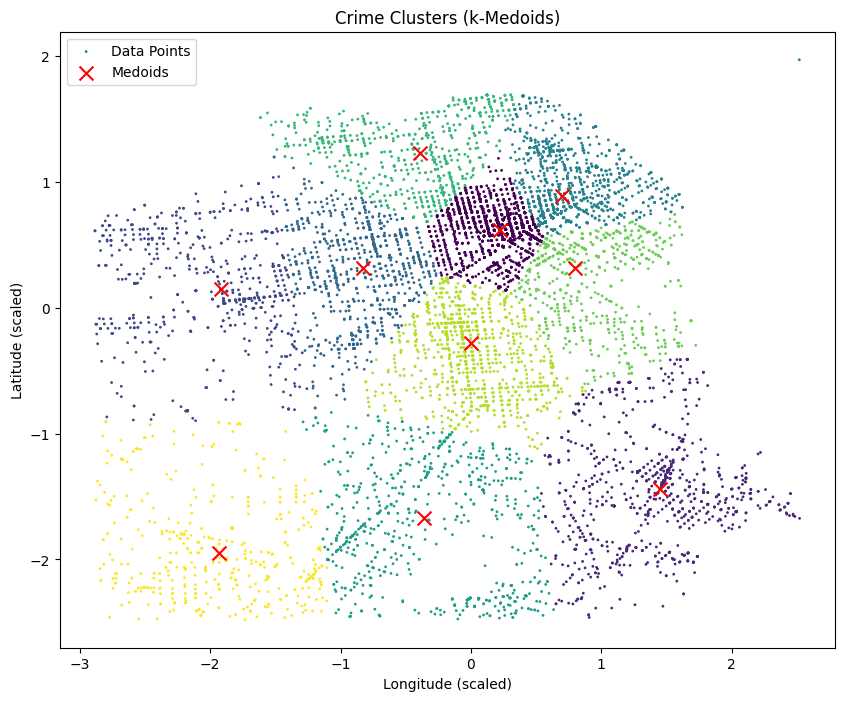

In [ ]:
# Step 6: Analyze and visualize the results
# Prepare data for visualization
cluster_labels = np.zeros(X_sample.shape[0])
for cluster_idx, cluster in enumerate(clusters):
    cluster_labels[cluster] = cluster_idx

# Visualize clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=cluster_labels, cmap='viridis', s=1, label='Data Points')
plt.scatter(X_sample[final_medoids, 0], X_sample[final_medoids, 1], c='red', marker='x', s=100, label='Medoids')
plt.title("Crime Clusters (k-Medoids)")
plt.xlabel("Longitude (scaled)")
plt.ylabel("Latitude (scaled)")
plt.legend()
plt.show()

In [ ]:
dff=df.copy()

In [ ]:
#convert date in date time
dff["Datetime"] = pd.to_datetime(dff["Dates"])

In [ ]:
# drop unnecessary columns
dff.drop(["Dates"], axis=1, inplace=True)

# dff.rename(columns={"ComputedDay": "DayOfWeek"}, inplace=True)
dff.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Datetime
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13 23:53:00
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13 23:33:00
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13 23:30:00
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13 23:30:00


In [ ]:
dff = df.drop(outliers.index)
print("عدد البيانات بعد حذف الـ Outliers:", len(dff))
display(dff.head())

عدد البيانات بعد حذف الـ Outliers: 815600


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [ ]:
dff.nunique()

,0
Dates,372820
Category,39
Descript,874
DayOfWeek,7
PdDistrict,10
Resolution,17
Address,19339
X,28843
Y,28843


In [ ]:
dff["Category"].unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'BURGLARY',
       'SUSPICIOUS OCC', 'DRUNKENNESS', 'WEAPON LAWS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'SEX OFFENSES FORCIBLE',
       'DISORDERLY CONDUCT', 'ARSON', 'FAMILY OFFENSES', 'PROSTITUTION',
       'DRIVING UNDER THE INFLUENCE', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [ ]:
dff["PdDistrict"].unique()

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'CENTRAL',
       'TENDERLOIN', 'MISSION', 'SOUTHERN', 'TARAVAL', 'RICHMOND'],
      dtype=object)

In [ ]:
dff["Resolution"].unique()

array(['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE',
       'JUVENILE BOOKED', 'UNFOUNDED', 'EXCEPTIONAL CLEARANCE', 'LOCATED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED',
       'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'JUVENILE CITED',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE'],
      dtype=object)

In [ ]:
# Total number of records for each crime category
g1 = dff.groupby("Category").size()
g1

,0
Category,
ARSON,1384
ASSAULT,72041
BAD CHECKS,377
BRIBERY,273
BURGLARY,33285
DISORDERLY CONDUCT,4159
DRIVING UNDER THE INFLUENCE,1990
DRUG/NARCOTIC,52800
DRUNKENNESS,4040


In [ ]:
# Total number of crimes per police district.
g2 = dff.groupby("PdDistrict").size()
g2

,0
PdDistrict,
BAYVIEW,89022
CENTRAL,85262
INGLESIDE,78718
MISSION,119713
NORTHERN,104978
PARK,49117
RICHMOND,26534
SOUTHERN,154895
TARAVAL,25734


In [ ]:
#Number of cases per resolution type
g3 = dff.groupby("Resolution").size()
g3

,0
Resolution,
"ARREST, BOOKED",198490
"ARREST, CITED",72940
CLEARED-CONTACT JUVENILE FOR MORE INFO,200
COMPLAINANT REFUSES TO PROSECUTE,3657
DISTRICT ATTORNEY REFUSES TO PROSECUTE,3651
EXCEPTIONAL CLEARANCE,1341
JUVENILE ADMONISHED,1218
JUVENILE BOOKED,5130
JUVENILE CITED,2842


In [ ]:
#Number of crimes reported at each address.
g4 = dff.groupby("Address").size()
g4

,0
Address,
0 Block of HARRISON ST,1
0 Block of 10TH AV,5
0 Block of 10TH ST,49
0 Block of 11TH ST,48
0 Block of 12TH AV,7
...,...
ZENO PL / FOLSOM ST,3
ZOE ST / BRANNAN ST,10
ZOE ST / BRYANT ST,10


In [ ]:
# Dates can be casted from object into datetime or numbers
dff.Dates = pd.to_datetime(dff.Dates)

first_date = dff.Dates.min()
last_date = dff.Dates.max()


print(f"  First Date of Crime: {first_date}")
print(f"  Last Date of Crime: {last_date}")
print(f"  Total Years of Crime: {(last_date-first_date).days // 365}")

  First Date of Crime: 2003-01-06 00:01:00
  Last Date of Crime: 2015-05-13 23:53:00
  Total Years of Crime: 12


In [ ]:
dff['Dates'] = pd.to_datetime(df['Dates'])


dff['Year'] = df['Dates'].dt.year

crimes_per_year = dff['Year'].value_counts().sort_index()

print(crimes_per_year)

Year
2003    68749
2004    67817
2005    65492
2006    65126
2007    63488
2008    65136
2009    64288
2010    62057
2011    61919
2012    66542
2013    70305
2014    69298
2015    25383
Name: count, dtype: int64


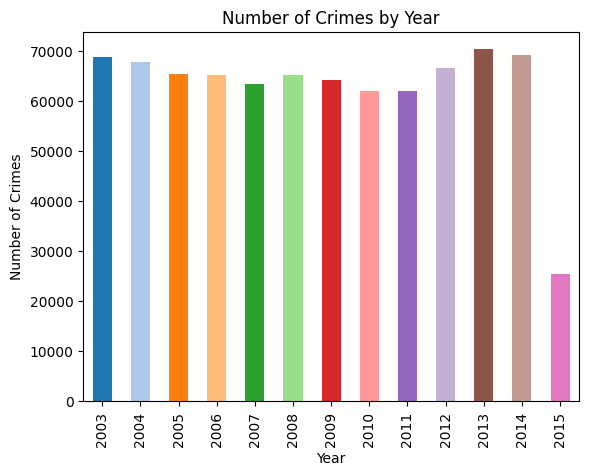

In [ ]:
colors = plt.cm.tab20.colors

crimes_per_year.plot(kind='bar',
                     color=colors[:len(crimes_per_year)],
                     title='Number of Crimes by Year')

plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

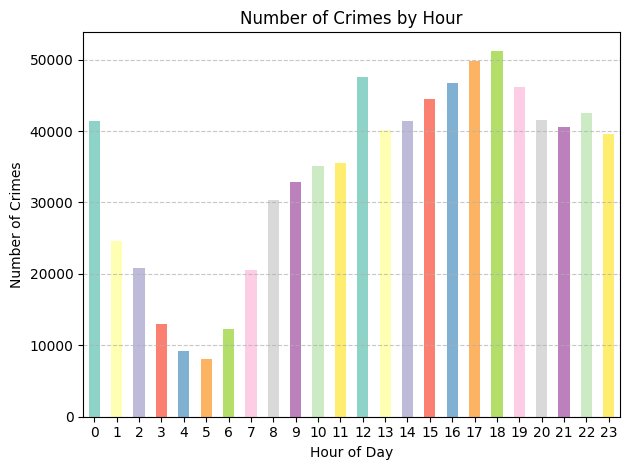

In [ ]:
dff['Dates'] = pd.to_datetime(df['Dates'])


dff['Hour'] = dff['Dates'].dt.hour

crimes_per_hour = dff['Hour'].value_counts().sort_index()

colors = plt.cm.Set3.colors

crimes_per_hour.plot(kind='bar',
                     color=colors[:len(crimes_per_hour)],
                     title='Number of Crimes by Hour')

plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

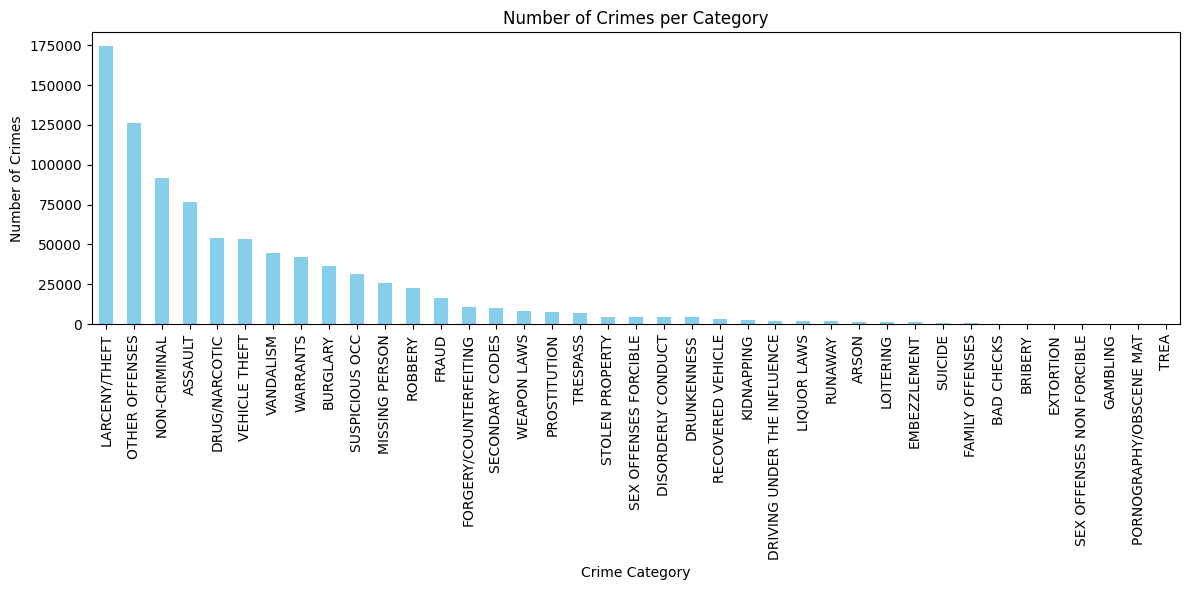

In [ ]:
# 1. Bar Chart - Number of Crimes per Category
plt.figure(figsize=(12,6))
df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Crimes per Category')
plt.xlabel('Crime Category')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

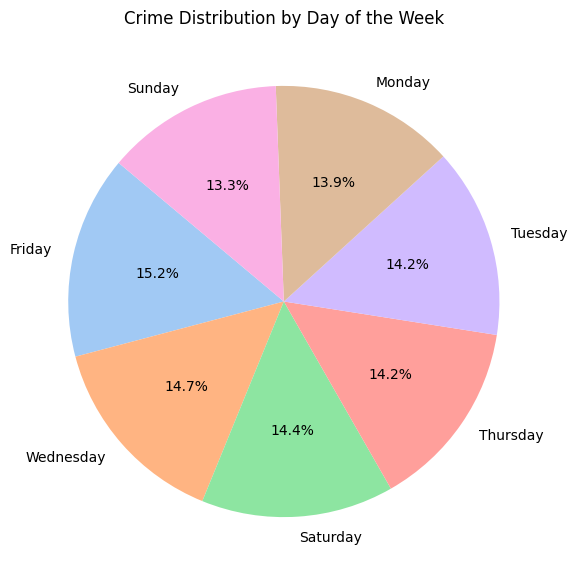

In [ ]:
# 2. Pie Chart - Crime Distribution by Day of the Week
day_counts = df['DayOfWeek'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Crime Distribution by Day of the Week')
plt.show()

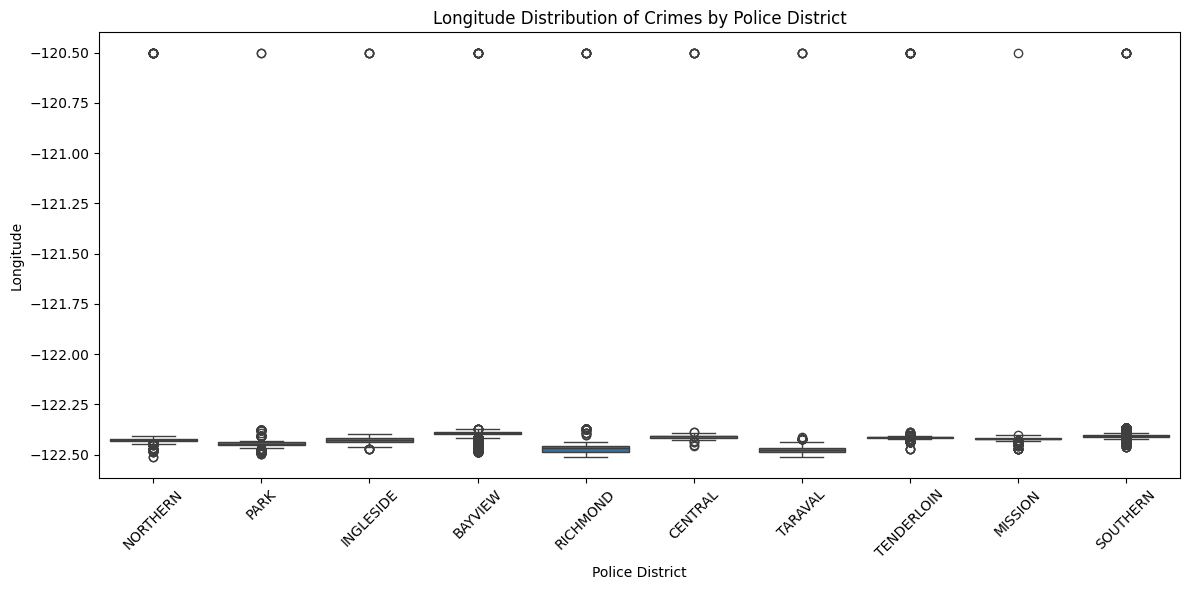

In [ ]:
# 3. Box Plot - Longitude Distribution by Police District
plt.figure(figsize=(12,6))
sns.boxplot(x='PdDistrict', y='X', data=df)
plt.title('Longitude Distribution of Crimes by Police District')
plt.xlabel('Police District')
plt.ylabel('Longitude')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

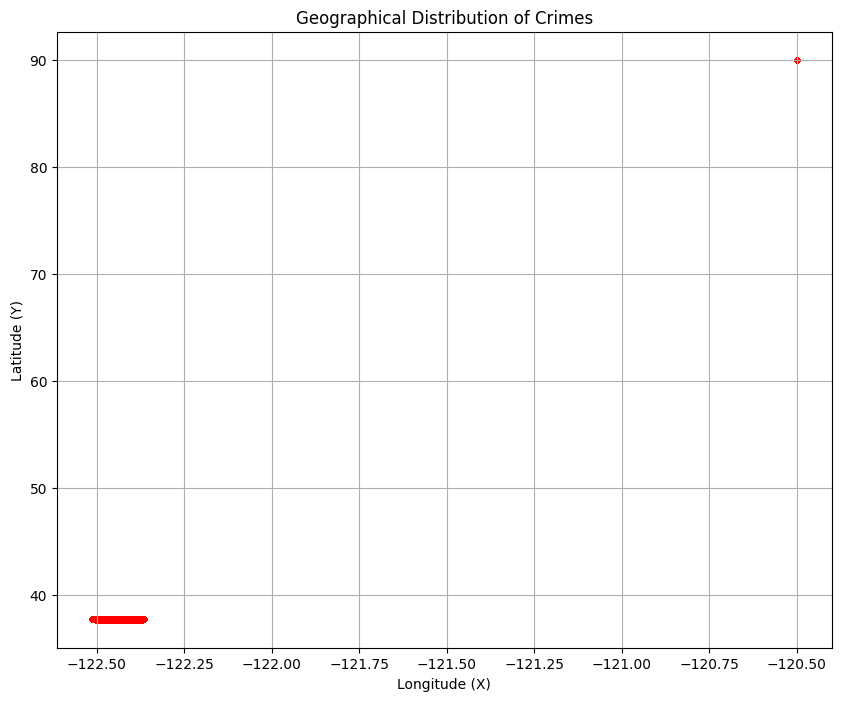

In [ ]:
# 4. Scatter Plot - Geographical Crime Locations
plt.figure(figsize=(10,8))
plt.scatter(df['X'], df['Y'], alpha=0.2, s=10, color='red')
plt.title('Geographical Distribution of Crimes')
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')
plt.grid(True)
plt.show()

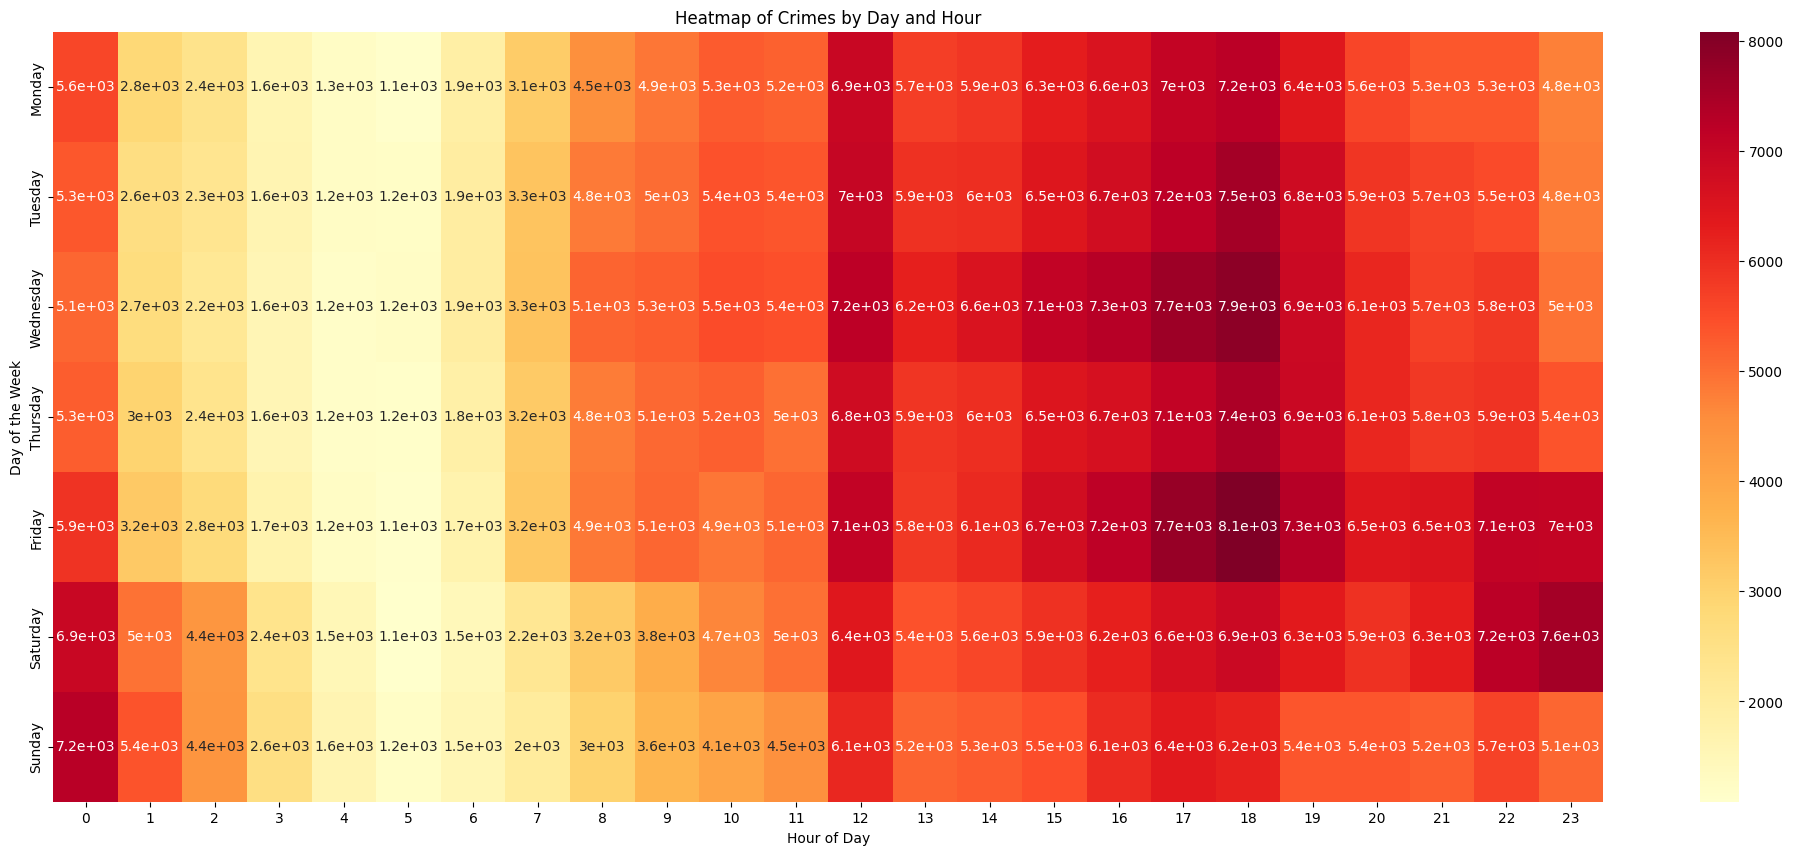

In [ ]:
# 5. Heatmap - Crime Distribution by Day and Hour
dff["Datetime"] = pd.to_datetime(dff["Dates"])
dff.loc[: ,'Hour'] = dff['Datetime'].dt.hour
heat_data = pd.crosstab(dff['DayOfWeek'], dff['Hour'])
# Reorder days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heat_data = heat_data.reindex(days_order)
plt.figure(figsize=(25,10))
sns.heatmap(heat_data ,annot=True,cmap='YlOrRd')
plt.title('Heatmap of Crimes by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.show()

In [ ]:
for data in [dff]:
    data['Dates'] = pd.to_datetime(data['Dates'])
    data['Hour'] = data['Dates'].dt.hour
    data['Month'] = data['Dates'].dt.month
    data['Year'] = data['Dates'].dt.year


le_day = LabelEncoder()
le_district = LabelEncoder()
le_category = LabelEncoder()

dff['DayOfWeek'] = le_day.fit_transform(dff['DayOfWeek'])
dff['PdDistrict'] = le_district.fit_transform(dff['PdDistrict'])
dff['Category'] = le_category.fit_transform(dff['Category'])


In [ ]:

feature_cols = ['DayOfWeek', 'PdDistrict', 'X', 'Y', 'Hour', 'Month', 'Year']
X = dff[feature_cols]
y = dff['Category']
vectorizer = TfidfVectorizer(max_features=100)
desc_features = vectorizer.fit_transform(dff['Descript']).toarray()


X = np.hstack((X, desc_features))


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f" Accuracy: {accuracy:.2f}")

 Accuracy: 0.92


In [ ]:
# Reduce the number of trees and depth
# Optimized Random Forest implementation
model = RandomForestClassifier(
    n_estimators=30,
    max_depth=8,
    min_samples_split=50,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
print("Starting model training...")
start_time = time.time()

model.fit(X_train, y_train)

end_time = time.time()
print(f"Training completed in {end_time - start_time:.2f} seconds")

# Evaluation
y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

print(f"\nAccuracy: {accuracy:f}")
print(f"Precision: {precision:f}")
print(f"Recall: {recall:f}")
print(f"F1 Score: {f1:f}")

Starting model training...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   36.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Training completed in 36.97 seconds

Accuracy: 0.800589
Precision: 0.816592
Recall: 0.800589
F1 Score: 0.772799


[Parallel(n_jobs=2)]: Done  30 out of  30 | elapsed:    0.8s finished
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


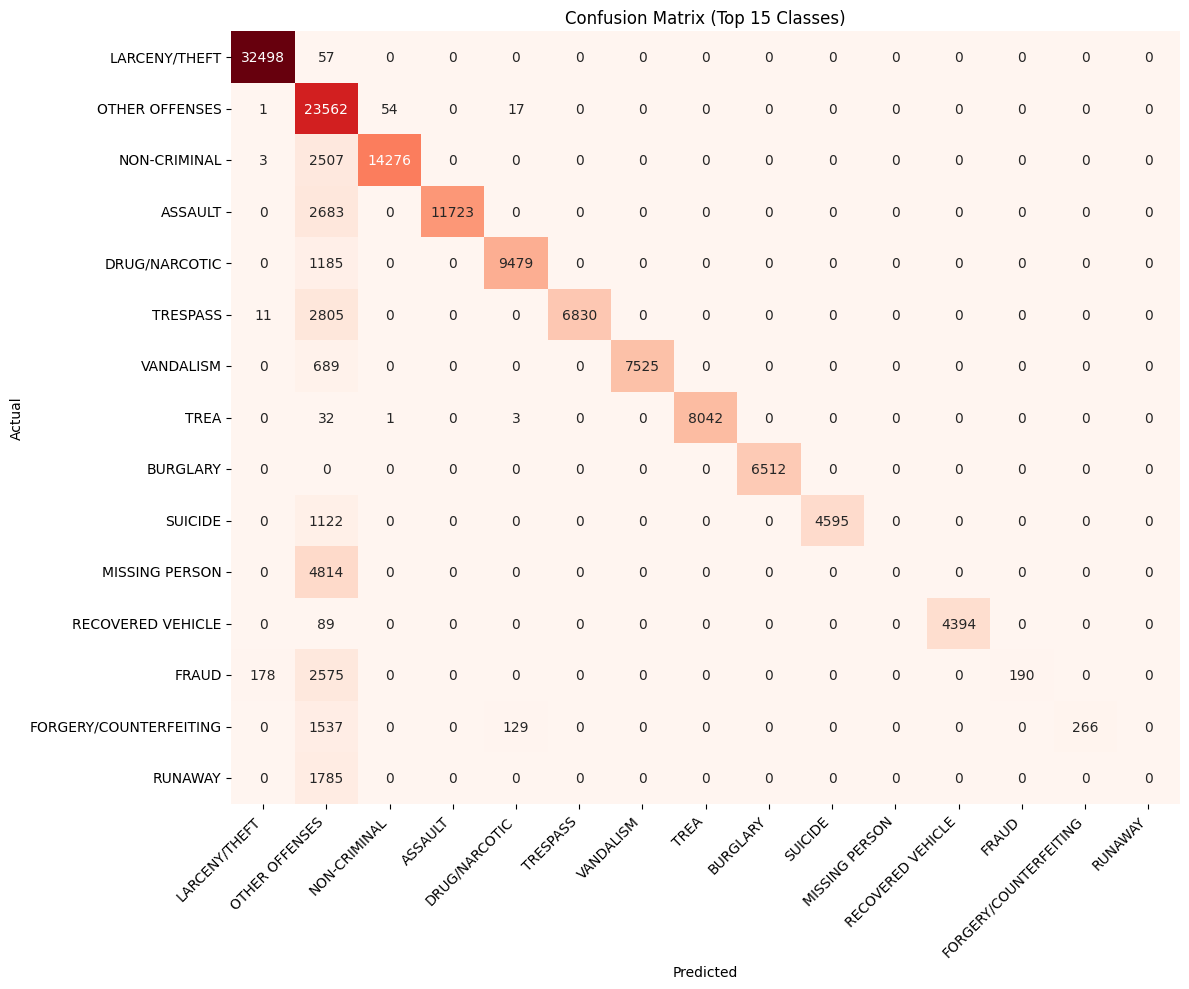

In [ ]:
# 4. Confusion matrix visualization
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_val, y_val_pred)

# show only top N classes
top_n = 15  # Adjust based on your needs
if len(le_category.classes_) > top_n:
    # Get indices of top N most frequent classes
    class_counts = np.sum(cm, axis=1)
    top_classes = np.argsort(-class_counts)[:top_n]
    cm = cm[top_classes][:, top_classes]
    class_names = le_category.classes_[top_classes]
else:
    class_names = le_category.classes_

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.title(f'Confusion Matrix (Top {len(class_names)} Classes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()